The first 3 Cells to Download the data and extracting it in google drive

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Data Set Exploaration
This Cell to learn how to read an image from the data set .

you will find the images is saved as numpy array ,each image have a lot of different  copies may be 44 or 38 not a constant number .
The data set consist of videos not images .

to make it clear 
we will have a model with input of (number of photos in video*3*256*256)
why 3 ?i don't know 
we will make three different models
the csv files are the labels of the data 

note : cv2.imshow() function is not working just use cv2_imshow() 
the difference is the "."



# Reading the whole dataset
**be careful don't run this cell again it will take around 15 mins** 

0000.npy
0001.npy
0002.npy
0003.npy
0004.npy
0005.npy
0006.npy
0007.npy
0008.npy
0009.npy
0010.npy
0011.npy
0012.npy
0013.npy
0014.npy
0015.npy
0016.npy
0017.npy
0018.npy
0019.npy
0020.npy
0021.npy
0022.npy
0023.npy
0024.npy
0025.npy
0026.npy
0027.npy
0028.npy
0029.npy
0030.npy
0031.npy
0032.npy
0033.npy
0034.npy
0035.npy
0036.npy
0037.npy
0038.npy
0039.npy
0040.npy
0041.npy
0042.npy
0043.npy
0044.npy
0045.npy
0046.npy
0047.npy
0048.npy
0049.npy
0050.npy
0051.npy
0052.npy
0053.npy
0054.npy
0055.npy
0056.npy
0057.npy
0058.npy
0059.npy
0060.npy
0061.npy
0062.npy
0063.npy
0064.npy
0065.npy
0066.npy
0067.npy
0068.npy
0069.npy
0070.npy
0071.npy
0072.npy
0073.npy
0074.npy
0075.npy
0076.npy
0077.npy
0078.npy
0079.npy
0080.npy
0081.npy
0082.npy
0083.npy
0084.npy
0085.npy
0086.npy
0087.npy
0088.npy
0089.npy
0090.npy
0091.npy
0092.npy
0093.npy
0094.npy
0095.npy
0096.npy
0097.npy
0098.npy
0099.npy
0100.npy
0101.npy
0102.npy
0103.npy
0104.npy
0105.npy
0106.npy
0107.npy
0108.npy
0109.npy
0110.npy
0

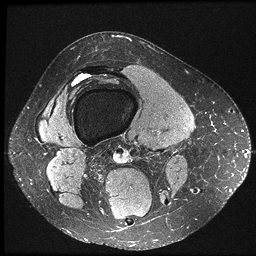

(256, 256, 3)


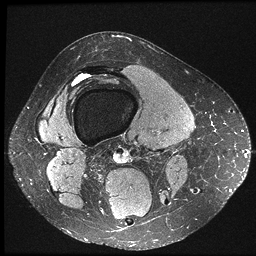

1

2

3

4

5

6

7

8

9

10

11

12

13

14

15

16

17

18

19

20

21

22

23

24

25

26

27

28

29

30

31

32

33

34

35

36

37

38

39

40

41

42

43

44

45

46

47

48

49

50

51

52

53

54

55

56

57

58

59

60

61

62

63

64

65

66

67



KeyboardInterrupt: ignored

In [0]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

paths =[ "/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/coronal/"
        ,"/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/axial/","/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train/sagittal/"]
all_data = []
for path in paths:
  directory=[]
  for r, d, f in os.walk(path):
      f = np.sort(f)
      for file in f:
          if '.npy' in file:
              #print(file)
              directory.append(os.path.join(r, file))
  all_data.append(directory)

# for f in files:
#     print(f)



def to_rgb(img,i):
    img = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA) 
#     print(img.shape)
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    if i==0:
      print(img.shape)
      cv2_imshow(img)
      print(img_rgb.shape)
      cv2_imshow(img_rgb)
#     img_rgb.shape
#     img_rgb=np.swapaxes(img_rgb,0,2)

#     print(img_rgb.shape)
    return img_rgb

# coronal=np.zeros(shape=(16649,256,256,3),dtype='uint8')
# coronalList=[]
sizes=[]
axialList=[]
k=0
# sagittalList=[]
for i in range(len(all_data[1])):
  print(i)
  print()
  a=np.load(all_data[1][i])
  f,j,k=a.shape
  sizes.append(f//2)
  for j in range(f//2):
    b=to_rgb(a[j],i+j)
    axialList.append(b)
#     coronal[k]=b
#     if i+j==0:
#       cv2_imshow(coronal[k])

  
    k+=1
    
axial=np.asarray(axialList,dtype='uint8')
axialList=None
    
print(axial.shape)
cv2_imshow(axial[0])

#   axial.append(np.load(all_data[1][i]))
#   sagittal.append(np.load(all_data[2][i]))
  
#   dataset[i,0]=a[0]
#   dataset[i,1]=b[0]
#   dataset[i,2]=c[0]
#   d=np.hstack((a[0],b[0],c[0]))
#   cv2_imshow(d)
#   e=np.hstack((dataset[i,0],dataset[i,1],dataset[i,2]))
print("axial read")
#   cv2_imshow(e)
#   cv2_imshow(dataset[i,0])
#   cv2_imshow(dataset[i,])


#   print(a.shape)
#   print(b.shape)

#   print(c.shape)
#   print("-------------------------")
#   print("-------------------------")
#   print("-------------------------")
#   print("-------------------------")



#getting labels

In [0]:
import pandas as pd
import numpy as np
# model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=["accuracy"])

data1 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-abnormal.csv") 
data2 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-acl.csv") 
data3 = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/train-meniscus.csv") 
print(data1.shape)
print(data2.shape)
print(data3.shape)
# print(data1.columns)
# print(data1['1'])
y1=np.array(data1["1"])
y2=np.array(data2["0"])
y3=np.array(data3["0"])
print("---------------------------------")


(1129, 2)
(1129, 2)
(1129, 2)
---------------------------------


In [0]:
for i in range(len(y2)):
  print(y3[i])

In [0]:
y1=np.hstack(('1',y1))
y2=np.hstack(('0',y2))
y3=np.hstack(('0',y3))
print(y1.shape)
print(y2.shape)
print(y3.shape)
# print(y)
Y_train1=[]
Y_train2=[]
Y_train3=[]
for i in range(len(sizes)):
  for j in range(sizes[i]):
    Y_train1.append(y1[i])
    Y_train2.append(y2[i])
    Y_train3.append(y3[i])
 
Y_train1=np.asarray(Y_train1)
Y_train2=np.asarray(Y_train2)
Y_train3=np.asarray(Y_train3)
print(Y_train1.shape);print(Y_train2.shape);print(Y_train3.shape)


(1130,)
(1130,)
(1130,)
(1749,)
(1749,)
(1749,)


In [0]:
Y_train_1=np.zeros(shape=(19227,2));Y_train_2=np.zeros(shape=(19227,2));Y_train_3=np.zeros(shape=(19227,2))
for i in range(len(Y_train1)):
  if Y_train1[i] == '1':
    Y_train_1[i][1]=1
  elif Y_train1[i] == '0':
    Y_train_1[i][0]=1
  if Y_train2[i] == '1':
    Y_train_2[i][1]=1
  elif Y_train2[i] == '0':
    Y_train_2[i][0]=1
  if Y_train3[i] == '1':
    Y_train_3[i][1]=1
  elif Y_train3[i] == '0':
    Y_train_3[i][0]=1
#Y_train
Y_train_3

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# Start training

** until now the first problem that the every video doesn't have the same number of frames , the first solution is to take the minimum number of frames and neglect the rest **

# ResNet50

In [0]:
#Imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
import keras
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint

Using TensorFlow backend.


# With ImageNet Weights

In [0]:
#Pretrained model
img_height,img_width = 256,256 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
# WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
# weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'sigmoid')(x)
model2 = Model(inputs = base_model.input, outputs = predictions)
# for i in model2.layers:
#     i.trainable=False
# for i in model2.layers[-5:]:
#     i.trainable=True
#model2.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
for layer in model2.layers[:-3]:
  layer.trainable=False
for layer in model2.layers[-3:]:
  layer.trainable=True
model2.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

print(model2.summary())

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization

In [0]:
filepath = '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/axial_abnormal.5.wts.h5'
history=model2.fit(axial,
    Y_train_1,
    batch_size=64,
    epochs=10,
    verbose=2,
     validation_split=0.3,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=0, mode='auto')]
    )
# we re-load the best weights once training is finished
model2.load_weights(filepath)

In [0]:
#Pretrained model
img_height,img_width = 256,256 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
# WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
# weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'sigmoid')(x)
model3 = Model(inputs = base_model.input, outputs = predictions)
# for i in model2.layers:
#     i.trainable=False
# for i in model2.layers[-5:]:
#     i.trainable=True
#model2.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
#for layer in model3.layers[:-3]:
#  layer.trainable=False
#for layer in model3.layers[-3:]:
#  layer.trainable=True
model3.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])
model3.fit(axial,Y_train_2,epochs=5,batch_size = 64,validation_split=0.05)
# print(model3.summary())
'''
filepath = '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/axial_acl.5.wts.h5'
history=model3.fit(axial,
    Y_train_2,
    batch_size=64,
    epochs=10,
    verbose=2,
     validation_split=0.1,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')]
    )
# we re-load the best weights once training is finished
model3.load_weights(filepath)
'''

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


Train on 18265 samples, validate on 962 samples
Epoch 1/5
18265/18265 [==============================] - 303s 17ms/step - loss: 0.2810 - acc: 0.8823 - val_loss: 1.1648 - val_acc: 0.8295
Epoch 2/5
18265/18265 [==============================] - 278s 15ms/step - loss: 0.0393 - acc: 0.9874 - val_loss: 0.6890 - val_acc: 0.8248
Epoch 3/5
18265/18265 [==============================] - 278s 15ms/step - loss: 0.0143 - acc: 0.9952 - val_loss: 0.8497 - val_acc: 0.8389
Epoch 4/5
18265/18265 [==============================] - 278s 15ms/step - loss: 0.0144 - acc: 0.9953 - val_loss: 1.3486 - val_acc: 0.7848
Epoch 5/5
18265/18265 [==============================] - 278s 15ms/step - loss: 0.0205 - acc: 0.9936 - val_loss: 1.4804 - val_acc: 0.6830


"\nfilepath = '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/axial_acl.5.wts.h5'\nhistory=model3.fit(axial,\n    Y_train_2,\n    batch_size=64,\n    epochs=10,\n    verbose=2,\n     validation_split=0.1,\n    callbacks = [\n        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),\n        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')]\n    )\n# we re-load the best weights once training is finished\nmodel3.load_weights(filepath)\n"

In [0]:
#Pretrained model
img_height,img_width = 256,256 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
# WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
# weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'sigmoid')(x)
model3 = Model(inputs = base_model.input, outputs = predictions)
# for i in model2.layers:
#     i.trainable=False
# for i in model2.layers[-5:]:
#     i.trainable=True
#model2.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
for layer in model3.layers[:-3]:
  layer.trainable=False
for layer in model3.layers[-3:]:
  layer.trainable=True
model3.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

print(model3.summary())
filepath = '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/axial_ammasdasdad.5.wts.h5'
history=model3.fit(axial,
    Y_train_2,
    batch_size=64,
    epochs=10,
    verbose=2,
     validation_split=0.3,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')]
    )
# we re-load the best weights once training is finished
model3.load_weights(filepath)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

# Trying without loading ImageNet Weights

In [0]:
img_height,img_width = 256,256 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
# WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
# weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model2 = Model(inputs = base_model.input, outputs = predictions)
# for i in model2.layers:
#     i.trainable=False
# for i in model2.layers[-5:]:
#     i.trainable=True
#model2.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
for layer in model3.layers[:-3]:
  layer.trainable=False
for layer in model3.layers[-3:]:
  layer.trainable=True

model2.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

filepath = '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/axial_acl.wts.h5'
history=model2.fit(axial,
    Y_train_3,
    batch_size=64,
    epochs=10,
    verbose=2,
     validation_split=0.1,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')]
    )
# we re-load the best weights once training is finished
model2.load_weights(filepath)


In [0]:
img_height,img_width = 256,256 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
# WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
# weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model2 = Model(inputs = base_model.input, outputs = predictions)
# for i in model2.layers:
#     i.trainable=False
# for i in model2.layers[-5:]:
#     i.trainable=True
#model2.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
for layer in model3.layers[:-3]:
  layer.trainable=False
for layer in model3.layers[-3:]:
  layer.trainable=True

model2.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

filepath = '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/axial_meniscus.5.wts.h5'
history=model2.fit(axial,
    Y_train_3,
    batch_size=64,
    epochs=10,
    verbose=2,
     validation_split=0.1,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')]
    )
# we re-load the best weights once training is finished
model2.load_weights(filepath)


In [0]:
#Pretrained model
img_height,img_width = 256,256 
num_classes = 2
#WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
#weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
base_model = applications.resnet50.ResNet50(weights=None, include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
model3 = Model(inputs = base_model.input, outputs = predictions)
#model3.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
model3.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
#1st - Coronal with Abnormal labels
#images = np.reshape(coronal,(len(coronal),256,256,3))
filepath = '/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/axial_abnormal2.5.wts.h5'
history=model2.fit(axial,
    Y_train_1,
    batch_size=64,
    epochs=10,
    verbose=2,
     validation_split=0.1,
    callbacks = [
        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='auto'),
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=0, mode='auto')]
    )
# we re-load the best weights once training is finished
model2.load_weights(filepath)

Train on 17304 samples, validate on 1923 samples
Epoch 1/10
 - 100s - loss: 0.5763 - acc: 0.7668 - val_loss: 0.6536 - val_acc: 0.8112
Epoch 2/10
 - 97s - loss: 0.5589 - acc: 0.7765 - val_loss: 0.6573 - val_acc: 0.8112
Epoch 3/10
 - 98s - loss: 0.5362 - acc: 0.7814 - val_loss: 0.6619 - val_acc: 0.8112
Epoch 4/10
 - 98s - loss: 0.5279 - acc: 0.7858 - val_loss: 0.6455 - val_acc: 0.8112
Epoch 5/10


KeyboardInterrupt: ignored

#Resnet 152

In [0]:



base152= ResNet152(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3),classes=2)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)
res152 = Model(inputs = base152.input, outputs = predictions)
# for i in model2.layers:
#     i.trainable=False
# for i in model2.layers[-5:]:
#     i.trainable=True
#model2.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
for layer in res152.layers[:-3]:
  layer.trainable=False
for layer in res152.layers[-3:]:
  layer.trainable=True
for layer in res152.layers:
  print(layer.trainable)
res152.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

print(model2.summary)


AttributeError: ignored

# New ResNet Implemented from scratch

In [0]:
# You will learn how to build very deep convolutional networks, using Residual Networks (ResNets)
# In theory, very deep networks can represent very complex functions; but in practice, they are hard to train. Residual Networks, introduced by He et al., allow you to train much deeper networks than were previously practically feasible.

# Let's import packages
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

# Identity block

def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    
    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size=(f,f), strides = (1,1), padding='same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size=(1,1), strides = (1,1), padding="valid", name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [0]:
# The convolutional block
# GRADED FUNCTION: convolutional_block

def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(filters = F1, kernel_size= (1, 1), strides = (s,s),padding="valid", name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    

    # Second component of main path 
    X = Conv2D(filters = F2, kernel_size=(f,f), strides=(1,1), name = conv_name_base + '2b', padding="same",kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name= bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path 
    X = Conv2D(filters = F3, kernel_size=(1,1), strides = (1,1), name= conv_name_base + '2c',padding="valid", kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    ##### SHORTCUT PATH #### 
    X_shortcut = Conv2D(filters = F3, kernel_size= (1,1), strides=(s,s), name=conv_name_base + '1', padding="valid", kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base+'1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation 
    X = Add()([X_shortcut,X])
    X = Activation("relu")(X)
    
    
    return X

In [0]:
# ResNet 50

def ResNet50(input_shape = (256, 256, 3), classes = 2):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER
    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes
    Returns:
    model -- a Model() instance in Keras
    """
    
    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)

    
    # Zero-Padding
    X = ZeroPadding2D((3, 3))(X_input)
    
    # Stage 1
    X = Conv2D(256, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    # Stage 2
    X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    # Stage 3
    X = convolutional_block(X, f=3, filters = [128,128,512], stage = 3, block='a', s=2)
    X = identity_block(X, 3, filters = [128,128,512],stage=3, block='b')
    X = identity_block(X, 3, filters = [128,128,512], stage=3, block='c')
    X = identity_block(X, 3, filters = [128,128,512], stage =3, block='d')

    # Stage 4 
    X = convolutional_block(X, f=3, filters = [256,256,1024],stage=4, block='a', s=2)
    X = identity_block(X, 3, filters = [256,256,1024], stage=4, block='b')
    X = identity_block(X, 3, filters = [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, filters= [256,256,1024], stage=4, block='d')
    X = identity_block(X, 3, filters=[256,256,1024], stage=4, block='e')
    X = identity_block(X, 3, filters=[256,256,1024], stage=4, block='f')

    # Stage 5 
    X = convolutional_block(X, f=3, filters=[256,256,2048], stage=5,block='a', s=3)
    X = identity_block(X, 3, filters=[256,256,2048], stage=5, block='b')
    X = identity_block(X,3, filters=[256,256,2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((2,2), name='avg_pool')(X)
    

    # output layer
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')
    #WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
    #weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
    #model.load_weights()
    #model.load_weights(weights_path,by_name=True)
    

    return model

#start evaluation

In [0]:
# Run the following code to build the model's graph. If your implementation is not correct you will know it by checking your accuracy when running model.fit(...) below.
model = ResNet50(input_shape = (256, 256, 3), classes = 2)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("done")

done


In [0]:
model.fit(axial, Y_train_1, epochs = 10, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
19227/19227 [==============================] - 311s 16ms/step - loss: 3.1419 - acc: 0.8037
Epoch 2/10
19227/19227 [==============================] - 285s 15ms/step - loss: 3.1449 - acc: 0.8038
Epoch 3/10
 2176/19227 [==>...........................] - ETA: 4:13 - loss: 3.0499 - acc: 0.8097

KeyboardInterrupt: ignored

In [0]:
np.shape(Y_train)

(16649,)

# Evaluate

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
(1749, 256, 256, 3)
(1749, 256, 256, 3)


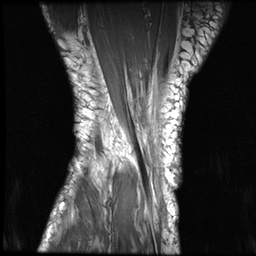

Done valid reading.


In [0]:
import cv2
import os
import numpy as np
#Prepare the test set
paths =[ "/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid/coronal/"
        ,"/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid/axial/","/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid/sagittal/"]
all_data2 = []
for path in paths:
  directory=[]
  for r, d, f in os.walk(path):
      for file in f:
          if '.npy' in file:
              directory.append(os.path.join(r, file))
  all_data2.append(directory)

#for j in range(len(all_data[0])):
def to_rgb(img,i):
    img = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA) 
#     print(img.shape)
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
#     img_rgb.shape
#     img_rgb=np.swapaxes(img_rgb,0,2)

#     print(img_rgb.shape)
    return img_rgb
#coronal_test=np.zeros(shape=(16649,256,256,3),dtype='uint8')
axialList=[]
sizes=[]
# axial=[]
k=0
# sagittal=[]
for i in range(len(all_data2[0])):
  print(i)
  a=np.load(all_data2[0][i])
  f,j,k=a.shape
  sizes.append(f//2)
  for j in range(f//2):
    b=to_rgb(a[j],i+j)
    axialList.append(b)
  
    k+=1
    
axial_test=np.asarray(axialList,dtype='uint8')
axialList=None
print(axial_test.shape)
    
print(axial_test.shape)
cv2_imshow(axial_test[0])

print("Done valid reading.")



In [0]:
#Test labels
import pandas as pd

data1_test = pd.read_csv("/content/gdrive/My Drive/MRNet Challenge/MRNet-v1.0/valid-abnormal.csv") 
print(data1_test.shape)
# print(data1.columns)
# print(data1['1'])

(119, 2)


In [0]:
print(data1_test)

In [0]:
y_test=np.array(data1_test["0"])
#print(y_test)

print("---------------------------------")
y_test=np.hstack(('1',y_test))
# print(y)
Y_test=[]
for i in range(len(sizes)):
  for j in range(sizes[i]):
    Y_test.append(y_test[i])
 
Y_test=np.asarray(Y_test)
print(Y_test.shape)
#rint(Y_test)
# print(data1[:][1])
# labels=data1[1]
# print(labels)
Y_test2=np.zeros(shape=(len(Y_test),2))
for i in range(len(Y_test)):
  if Y_test[i] == '1':
    Y_test2[i][1]=1
  elif Y_test2[i] == '0':
    Y_test2[i][0]=1
#Y_train
Y_test2

---------------------------------
(1749,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

# Predictions

In [0]:
preds = model.evaluate(coronal_test, Y_test2)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1749/1749 [==============================] - 9s 5ms/step
Loss = 0.3811340511373413
Test Accuracy = 0.8979416809605489


In [0]:
preds = model2.evaluate(coronal_test, Y_test2)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1749/1749 [==============================] - 29s 16ms/step
Loss = 0.8142469329892601
Test Accuracy = 0.8413379074438018


In [0]:
preds = model3.evaluate(coronal_test, Y_test2)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1749/1749 [==============================] - 9s 5ms/step
Loss = 0.24812371320830814
Test Accuracy = 0.7444253860029785


In [0]:
preds = model3.evaluate(axial_test, Y_test2)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

NameError: ignored

# Begin the combined training ( One model will be trained several times once per series )

In [0]:
#Pretrained model
img_height,img_width = 256,256 
num_classes = 2
#If imagenet weights are being loaded, 
#input must have a static square shape (one of (128, 128), (160, 160), (192, 192), or (224, 224))
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', WEIGHTS_PATH_NO_TOP, cache_subdir='models', md5_hash='a268eb855778b3df3c7506639542a6af')
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))
#weights= 'imagenet'
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'softmax')(x)

#sagital_model.load_weights(weights_path,by_name=True)
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.0001)
sagital_model = Model(inputs = base_model.input, outputs = predictions)
sagital_model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

coronal_model = Model(inputs = base_model.input, outputs = predictions)
coronal_model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])

axial_model = Model(inputs = base_model.input, outputs = predictions)
axial_model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


#loading the model weights and start evaluation

In [0]:
base_model = applications.resnet50.ResNet50(weights= 'imagenet', include_top=False, input_shape= (img_height,img_width,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation= 'sigmoid')(x)
evaluation_model = Model(inputs = base_model.input, outputs = predictions)
# for i in model2.layers:
#     i.trainable=False
# for i in model2.layers[-5:]:
#     i.trainable=True
#model2.load_weights(weights_path,by_name=True)